In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [2]:
pts = pd.read_csv('points.csv')
pts.head()

,Name,TeamAbbreviation,GamesPlayed,Minutes,OffPoss,Points,FG2M,FG2A,Fg2Pct,FG3M,...,FG3APct,ShotQualityAvg,EfgPct,TsPct,PtsPutbacks,Fg2aBlocked,FG2APctBlocked,Fg3aBlocked,FG3APctBlocked,Usage
0,Tobias Harris,PHI,65,2244,4551,1259,377,723,0.521438,117,...,0.308795,0.496745,0.528203,0.554626,34,53,0.073306,1,0.003096,23.826291
1,James Harden,HOU,61,2241,4741,2096,332,617,0.538088,271,...,0.554834,0.524821,0.532828,0.614663,26,75,0.121556,11,0.014304,36.385768
2,Devin Booker,PHX,62,2241,4724,1619,418,768,0.544271,126,...,0.313059,0.505150,0.542934,0.604556,8,55,0.071615,7,0.020000,29.356061
3,Bam Adebayo,MIA,65,2235,4483,1053,407,706,0.576487,1,...,0.018081,0.514762,0.568150,0.604478,64,52,0.073654,1,0.076923,21.261588
4,Harrison Barnes,SAC,64,2231,4596,941,233,468,0.497863,93,...,0.341772,0.505396,0.523910,0.572384,28,37,0.079060,0,0.000000,17.602190


In [3]:
pts.columns

Index(['Name', 'TeamAbbreviation', 'GamesPlayed', 'Minutes', 'OffPoss',
       'Points', 'FG2M', 'FG2A', 'Fg2Pct', 'FG3M', 'FG3A', 'Fg3Pct',
       'NonHeaveFg3Pct', 'FtPoints', 'PtsAssisted2s', 'PtsUnassisted2s',
       'PtsAssisted3s', 'PtsUnassisted3s', 'Assisted2sPct',
       'NonPutbacksAssisted2sPct', 'Assisted3sPct', 'FG3APct',
       'ShotQualityAvg', 'EfgPct', 'TsPct', 'PtsPutbacks', 'Fg2aBlocked',
       'FG2APctBlocked', 'Fg3aBlocked', 'FG3APctBlocked', 'Usage'],
      dtype='object')

In [4]:
rel = pts[['Name', 'PtsAssisted2s', 'PtsUnassisted2s', 'PtsAssisted3s', 'PtsUnassisted3s']]

In [7]:
threes = pts[['Name', 'PtsAssisted3s', 'PtsUnassisted3s']].sort_values('PtsUnassisted3s', ascending=False)
threes['PtsAssisted3s'] = threes['PtsAssisted3s']/3
threes['PtsUnassisted3s'] = threes['PtsUnassisted3s']/3
threes = threes.iloc[:100]
threes = threes.reset_index()#.drop('Index', axis=1, inplace=True)
threes.head()

,index,Name,PtsAssisted3s,PtsUnassisted3s
0,1,James Harden,41.0,230.0
1,14,Damian Lillard,64.0,162.0
2,15,Trae Young,61.0,144.0
3,66,Luka Doncic,37.0,119.0
4,7,Devonte' Graham,119.0,99.0


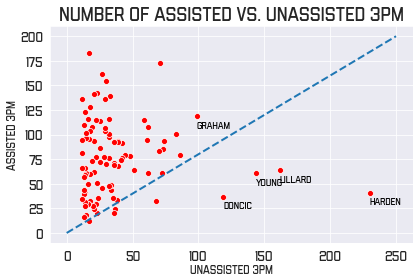

In [13]:
ax = sns.scatterplot(x='PtsUnassisted3s', y='PtsAssisted3s', data=threes, color='red');
sns.set_style('darkgrid')
prop = fm.FontProperties(fname='Liberator-Light.ttf')
plt.xticks(fontproperties=prop, size=14);
plt.yticks(fontproperties=prop, size=14);
plt.xlabel('Unassisted 3PM', fontproperties=prop, size=12);
plt.ylabel('Assisted 3PM', fontproperties=prop, size=12);
#plt.axhline(y=np.mean(data['Points']),linewidth=2, color='k');
ax.set_title('Number of Assisted vs. Unassisted 3PM', fontproperties=prop, size=20)

for line in range(0,5):
    if line == 0:
        plt.text(threes.PtsUnassisted3s[line]-0.2, threes.PtsAssisted3s[line]-12, threes.Name[line].split(' ')[1], fontproperties=prop, horizontalalignment='left', size=10, color='black')
    else:
        plt.text(threes.PtsUnassisted3s[line]-0.2, threes.PtsAssisted3s[line]- 12, threes.Name[line].split(' ')[1], fontproperties=prop, horizontalalignment='left', size=10, color='black')
#plt.text(2, y, s, fontsize=12)
plt.plot([0, 250], [0, 200], '--', linewidth=2)
plt.tight_layout()
plt.savefig("threees.png")

In [14]:
twos = pts[['Name', 'PtsAssisted2s', 'PtsUnassisted2s']].sort_values('PtsUnassisted2s', ascending=False)
twos['PtsAssisted2s'] = twos['PtsAssisted2s']/2
twos['PtsUnassisted2s'] = twos['PtsUnassisted2s']/2
twos = twos.iloc[:100]
twos = twos.reset_index()#.drop('Index', axis=1, inplace=True)
twos.head()

,index,Name,PtsAssisted2s,PtsUnassisted2s
0,43,Russell Westbrook,120.0,397.0
1,18,DeMar DeRozan,134.0,361.0
2,17,LeBron James,112.0,341.0
3,9,Donovan Mitchell,89.0,315.0
4,71,Giannis Antetokounmpo,234.0,306.0


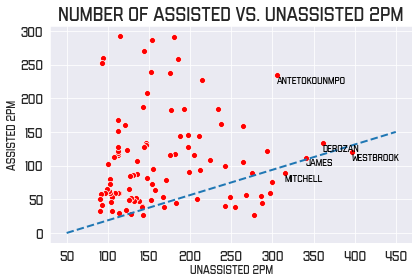

In [29]:
ax = sns.scatterplot(x='PtsUnassisted2s', y='PtsAssisted2s', data=twos, color='red');
sns.set_style('darkgrid')
prop = fm.FontProperties(fname='Liberator-Light.ttf')
plt.xticks(fontproperties=prop, size=14);
plt.yticks(fontproperties=prop, size=14);
plt.xlabel('Unassisted 2PM', fontproperties=prop, size=12);
plt.ylabel('Assisted 2PM', fontproperties=prop, size=12);
#plt.axhline(y=np.mean(data['Points']),linewidth=2, color='k');
ax.set_title('Number of Assisted vs. Unassisted 2PM', fontproperties=prop, size=20)

for line in range(0,5):
    if line == 0:
        plt.text(twos.PtsUnassisted2s[line]-0.2, twos.PtsAssisted2s[line]-12, twos.Name[line].split(' ')[1], fontproperties=prop, horizontalalignment='left', size=10, color='black')
    else:
        plt.text(twos.PtsUnassisted2s[line]-0.2, twos.PtsAssisted2s[line]- 12, twos.Name[line].split(' ')[1], fontproperties=prop, horizontalalignment='left', size=10, color='black')
#plt.text(2, y, s, fontsize=12)
plt.plot([50, 450], [0, 150], '--', linewidth=2)
plt.tight_layout()
plt.savefig("twos.png")